# Practical work on deformable models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import os
# necessite scikit-image 
from skimage import io as skio
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import disk_level_set
import imageio

#### Images

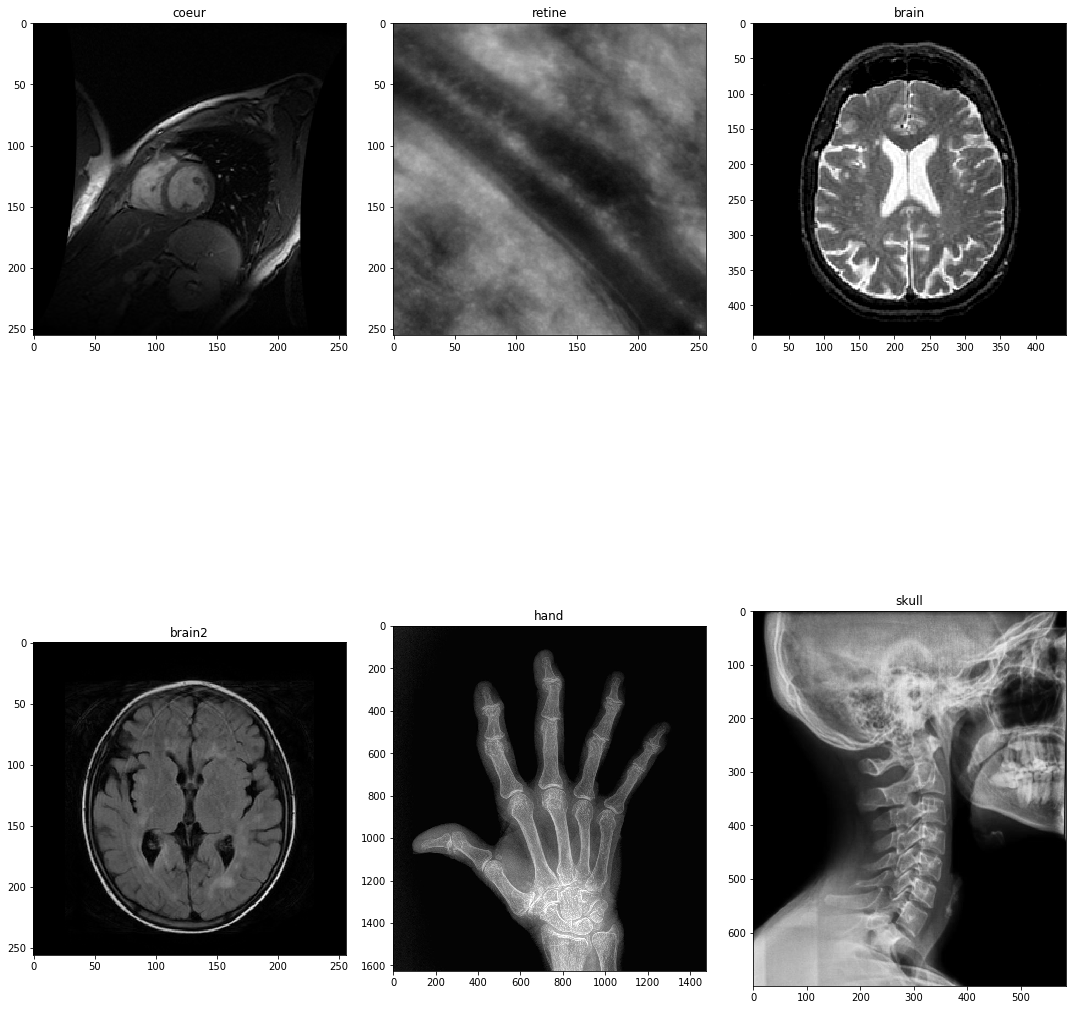

In [47]:
#Load images
im_coeur=skio.imread('images/coeurIRM.bmp')

im_retine=skio.imread('images/retineOA.bmp')

im_brain=skio.imread('images/brain.bmp')
im_brain=im_brain[:,:,1]

im_brain2=skio.imread('images/brain2.bmp')

im_hand2 = skio.imread('images/hand-OA.jpg')
im_hand2[300:700, 100:340] = im_hand2[800,250 ]
im_hand2 = im_hand2[:,:,:3].sum(axis=2)/3

im_skull = skio.imread('images/skull.jpg')
im_skull = im_skull[:,:,:3].sum(axis=2)/3


#Show images
axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(2, 3, sharex=False, sharey=False))
axs[0][0].imshow(im_coeur,cmap="gray",vmin=0, vmax=255)
axs[0][0].set_title('coeur')
axs[0][1].imshow(im_retine,cmap="gray",vmin=0, vmax=255)
axs[0][1].set_title('retine')
axs[0][2].imshow(im_brain,cmap="gray",vmin=0, vmax=255)
axs[0][2].set_title('brain')

axs[1][0].imshow(im_brain2,cmap="gray",vmin=0, vmax=255)
axs[1][0].set_title('brain2')
axs[1][1].imshow(im_hand2,cmap="gray",vmin=0, vmax=255)
axs[1][1].set_title('hand')

axs[1][2].imshow(im_skull,cmap="gray",vmin=0, vmax=255)
axs[1][2].set_title('skull')
#plt.subplots_adjust(bottom = 0.5)
plt.tight_layout()
plt.show()

# 1 - Paramètres

#### Useful Functions

In [4]:
def active_contours(img,init, boundary = 'fixed', save = False):

    axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 5, sharex=False, sharey=False))
   
    
    param = ['periodic', 'free', 'fixed', 'free-fixed', 'fixed-free']
    for i in range(len(param)) : 

        snake = active_contour(gaussian(im, 1), init, boundary_condition=param[i],
                           alpha=0.01, beta=2, w_line=0, w_edge=10, gamma=0.01)

        axs[i].imshow(im, cmap=plt.cm.gray)
        axs[i].plot(init[:, 1], init[:, 0], '--r', lw=3)
        axs[i].plot(snake[:, 1], snake[:, 0], '-b', lw=3)
        axs[i].set_xticks([]), axs[i].set_yticks([])
        axs[i].axis([0, im.shape[1], im.shape[0], 0])
        axs[i].set_title(param[i])

    if save:
        plt.savefig('images/active_contour_boundary_box.pdf', bbox_inches = 'tight')

    plt.show()
    
def partie_1_multiple(img,init,name_param, param, save = False):
    
    params = ['alpha', 'beta', 'w_line', 'w_edge', 'gamma', 'max_px_move', 'max_num_iter', 'convergence', 'boundary_condition']
    if name_param not in params:
        raise ValueError("le nom du paramètre à faire varier est incorrect/n'existe pas.")
        
    axs = plt.figure(figsize=(10,5),constrained_layout=True)

    plt.imshow(im, cmap=plt.cm.gray)
    #plt.set_xticks([]), ax.set_yticks([])
    plt.axis([0, im.shape[1], im.shape[0], 0])
    plt.plot(init[:, 1], init[:, 0], '--r', lw=3)
    
    #pour changer la colormap : https://matplotlib.org/stable/users/explain/colors/colormaps.html
    colormap = plt.cm.get_cmap('PiYG')
    
    for i in range(len(param)):
        if name_param == 'alpha':
            snake = active_contour(gaussian(im,0.1), init, alpha=param[i], beta=5,
                                   w_edge=10, gamma=0.001)
        if name_param == 'beta':
            snake = active_contour(gaussian(im,0.1), init, alpha=0.1, beta=param[i],
                                   w_edge=10, gamma=0.001)
        if name_param == 'w_line':
            snake = active_contour(gaussian(im,0.1), init, alpha=0.1, beta=5,
                                   w_line = param[i], w_edge=10, gamma=0.001)
        if name_param == 'w_edge':
            snake = active_contour(gaussian(im,0.1), init, alpha=0.1, beta=5,
                                   w_edge= param[i], gamma=0.001)
        if name_param == 'gamma':
            snake = active_contour(gaussian(im,0.1), init, alpha=0.5, beta=5,
                                   w_edge=10, gamma=param[i])
        if name_param == 'max_px_move':
            snake = active_contour(gaussian(im,0.1), init, alpha=0.1, beta=5,
                                   w_edge=10, gamma=0.001, max_px_move = param[i])
        if name_param == 'max_num_iter':
            snake = active_contour(gaussian(im,0.1), init, alpha=0.1, beta=5,
                                   w_edge=10, gamma=0.001, max_num_iter = param[i])
        if name_param == 'convergence':
            snake = active_contour(gaussian(im,0.1), init, alpha=0.1, beta=5,
                                   w_edge=10, gamma=0.001, convergence = param[i])
        if name_param == 'boundary_condition':
            param = ['periodic', 'free', 'fixed', 'free-fixed', 'fixed-free']
            snake = active_contour(gaussian(im,0.1), init, alpha=0.1, beta=5,
                                   w_edge=10, gamma=0.001, boundary_condition = param[i])
        
        
        normalized_val = (param[i] - param[0]) / (param[-1] - param[0])
        color = colormap(normalized_val)

        
        plt.plot(snake[:, 1], snake[:, 0], color=color,alpha=0.05)
        
              
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=param[0], vmax=param[-1]))
    sm.set_array([])
    
    # Add the colorbar using the fake scalar mappable
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    
    cbar = plt.colorbar(sm,ax=frame1)
    cbar.set_label('Parameter Value')
    #plt.colorbar()
    plt.title('Impact du paramètre : '+name_param)
    if save :
        plt.savefig('images/active_contour_'+name_param+'.pdf',bbox_inches="tight")
    plt.show()

## 1.1 Active contours

In [225]:
#s = np.linspace(0, 2*np.pi, 100)
#r = 140 + 25*np.sin(s)
#c = 130 + 25*np.cos(s)
#init = np.array([r, c]).T

#r = np.linspace(20, 80, 100)
#c = np.linspace(20, 100, 100)
#init = np.array([r, c]).T

#s = np.linspace(0, 2*np.pi, 100)
#r = 130 + 120*np.sin(s)
#c = 130 + 120*np.cos(s)
#init = np.array([r, c]).T

im=im_brain2
s = np.linspace(0, 2*np.pi, 100)
r = 130 + 120*np.sin(s)
c = 130 + 120*np.cos(s)
init_b2 = np.array([r, c]).T



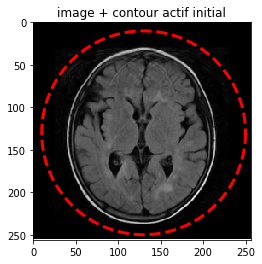

In [229]:
plt.imshow(im_brain2, cmap=plt.cm.gray)
plt.plot(init_b2[:, 1], init_b2[:, 0], '--r', lw=3)
#plt.set_xticks([]), plt.set_yticks([])
plt.axis([0, im_brain2.shape[1], im_brain2.shape[0], 0])
plt.title('image + contour actif initial')
#plt.savefig("images/init.pdf", bbox_inches = 'tight')
plt.show()

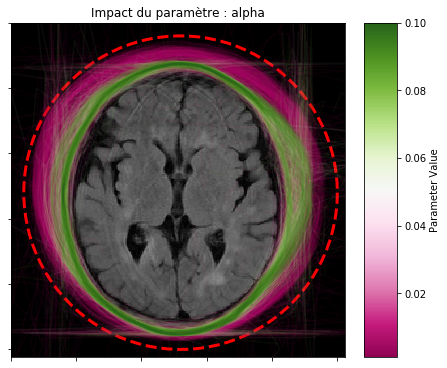

In [120]:
name_param = 'alpha'
tmp_arr=[]
tmp_arr+=list(np.linspace(0.001,0.01,1000))
tmp_arr+=list(np.linspace(0.05,0.1,512))
partie_1_multiple(im,init,name_param, tmp_arr, save = False)

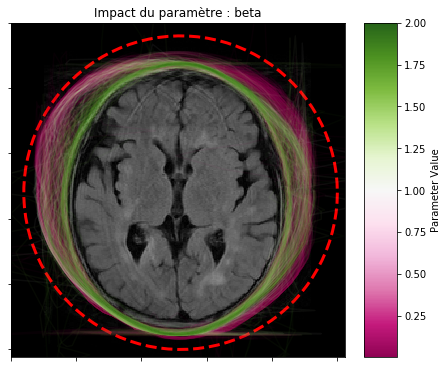

In [119]:
name_param = 'beta'
tmp_arr=[]
tmp_arr+=list(np.linspace(0.001,0.01,512))
tmp_arr+=list(np.linspace(1,2,256))
partie_1_multiple(im,init,name_param, tmp_arr, save = False)

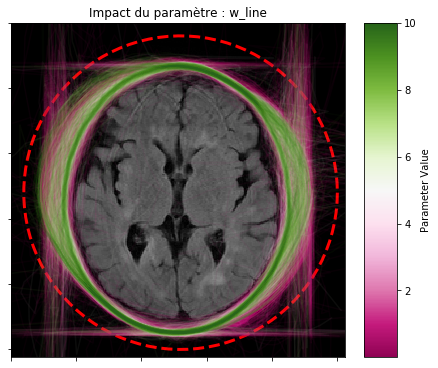

In [128]:
name_param = 'w_line'
tmp_arr=[]
tmp_arr+=list(np.linspace(0.001,1,3000))
tmp_arr+=list(np.linspace(1,10,1000))
#tmp_arr=np.linspace(0.1,10,512)
partie_1_multiple(im,init,name_param, tmp_arr, save = False)

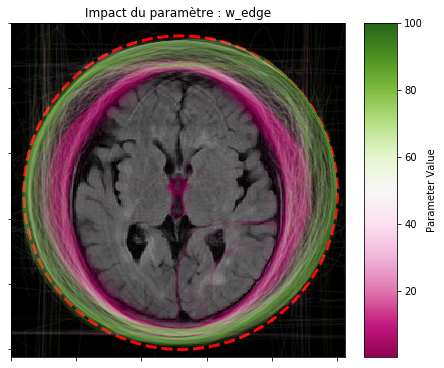

In [125]:
name_param = 'w_edge'
tmp_arr=[]
tmp_arr+=list(np.linspace(0.1,3,1000))
tmp_arr+=list(np.linspace(1,100,512))
partie_1_multiple(im,init,name_param, tmp_arr, save = False)

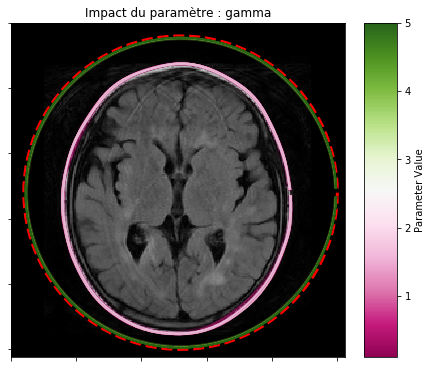

In [137]:
name_param = 'gamma'
tmp_arr=[]
tmp_arr+=list(np.linspace(0.1,2,256))
tmp_arr+=list(np.linspace(4,5,128))

partie_1_multiple(im,init,name_param, tmp_arr, save = False)

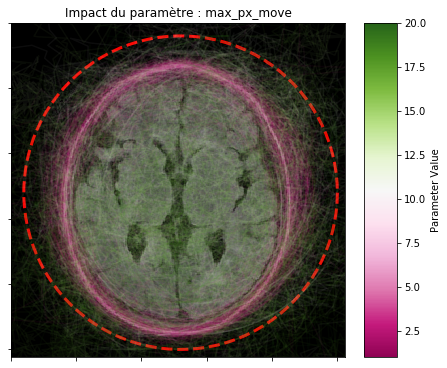

In [169]:
name_param = 'max_px_move'
tmp_arr = []
tmp_arr+=list(np.linspace(1,5, 256))
tmp_arr+=list(np.linspace(10,20, 256))

partie_1_multiple(im,init,name_param, tmp_arr, save = False)

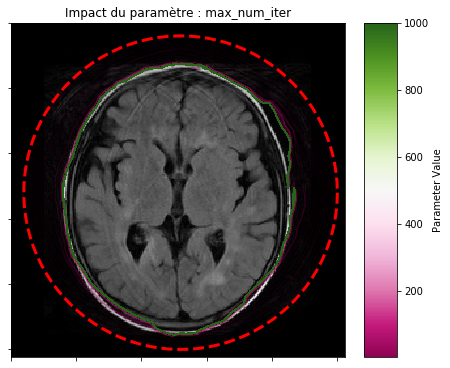

In [168]:
name_param = 'max_num_iter'
tmp_arr=np.linspace(1,1000,512)
partie_1_multiple(im,init,name_param, tmp_arr, save = False)

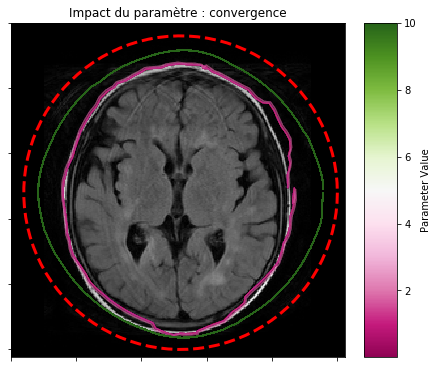

In [139]:
name_param = 'convergence'
tmp_arr=np.linspace(0.001,10,512)
partie_1_multiple(im,init,name_param, tmp_arr, save =False)

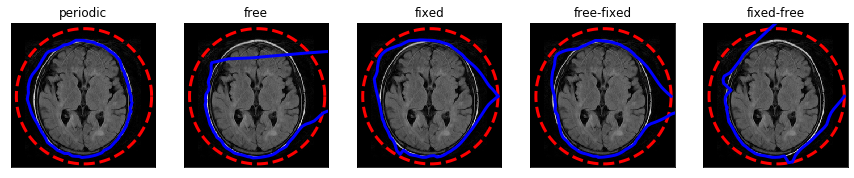

In [163]:
name_param = 'boundary_condition'
active_contours(im, init, boundary=p, save = False)        

## 1.2 Chan-Vese method

#### Useful functions

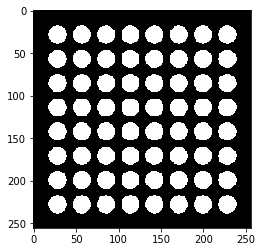

In [46]:
def init_ls_circle(im, n):
    circleNum = n
    circleRadius = im.shape[0] / (3*circleNum)
    circleStep0 = im.shape[0]/(circleNum+1)
    circleStep1 = im.shape[1]/(circleNum+1)
    init_ls = np.zeros(im.shape)
    for i in range(circleNum):
            for j in range(circleNum):
                center_f= ((i+1)*circleStep0, (j+1)*circleStep1)

                init_ls = init_ls + disk_level_set (im.shape,center=center_f,radius=circleRadius)
    return init_ls

def partie_2(img, init='checkerboard', save=False):
    
    axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 2, sharex=False, sharey=False))
    
    
    cv = chan_vese(img, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=init, extended_output=True)

            
    axs[0].imshow(cv[0],cmap="gray")
    t = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
    axs[0].set_title(t)

    axs[1].imshow(cv[1], cmap="gray")
    axs[1].set_title("Final Level Set", fontsize=12)


    if save:
        plt.savefig('images/chan_vese.pdf')
    plt.show()

    
def partie_2_multiple(img,name_param, param, init='checkerboard', save = False):
    
    params = ['mu', 'lambda1', 'lambda2', 'tol', 'max_num_iter', 'dt', 'init_level_set', 'extended_output']
    if name_param not in params:
        print("le nom du paramètre à faire varier est incorrect/n'existe pas.")
        
    axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, len(param), sharex=False, sharey=False))
    
    
    for i in range(len(param)):
        if name_param == 'mu':
            cv = chan_vese(img, mu=param[i], lambda1=5, lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=init, extended_output=True)

        if name_param == 'lambda1':
            cv = chan_vese(img, mu=0.25, lambda1=param[i], lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=init, extended_output=True)

        if name_param == 'lambda2':
            cv = chan_vese(img, mu=0.25, lambda1=param[i], lambda2=param[i], tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=init, extended_output=True)
        if name_param == 'tol':
            cv = chan_vese(img, mu=0.25, lambda1=5, lambda2=1, tol=param[i], max_num_iter=200,
                   dt=0.5, init_level_set=init, extended_output=True)

        if name_param == 'max_num_iter':
            cv = chan_vese(img, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_num_iter=param[i],
                   dt=0.5, init_level_set=init, extended_output=True)

        if name_param == 'dt':
            cv = chan_vese(img, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=param[i], init_level_set=init, extended_output=True)

        if name_param == 'init_level_set':
            cv = chan_vese(img, mu=0.25, lambda1=5, lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=param[i], extended_output=True)
            
                


        
        axs[i].imshow(cv[0],cmap="gray")
        if name_param == 'init_level_set' and param[i] not in ['checkerboard', 'disk', 'small disk']:
            t = name_param+" = custom"
        else:
            t = name_param+" = "+str(param[i])
        
        #t = "Chan-Vese-{} iterat°".format(len(cv[2]))
        axs[i].set_title(t)
        #axs[1][i].imshow(cv[1], cmap="gray")
        #axs[1][i].set_title("Final Level Set", fontsize=12)
        #axs[1][i].set_title(t)
   
    plt.subplots_adjust(top= 0.4)
    if save :
        plt.savefig('images/chan_vese_'+name_param+'.pdf',bbox_inches="tight")
    plt.show()

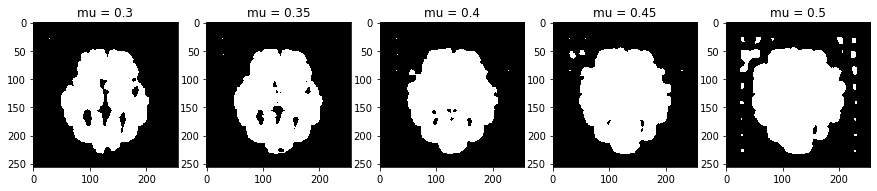

In [34]:
im = im_brain2
name_param = 'mu'
tmp_arr = np.linspace(0.3, 0.5, 5)
partie_2_multiple(im,name_param, tmp_arr,init = init_ls_circle(im, 8), save =True)

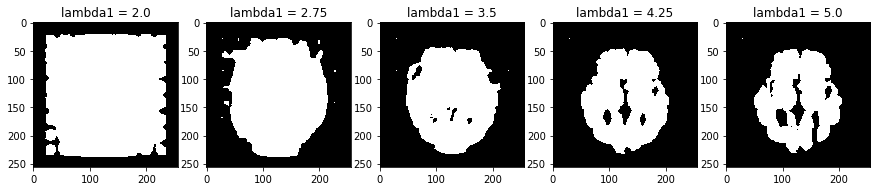

In [36]:
im = im_brain2
name_param = 'lambda1'
tmp_arr=np.linspace(2,5,5)
partie_2_multiple(im,name_param, tmp_arr,init = init_ls_circle(im, 8), save =True)

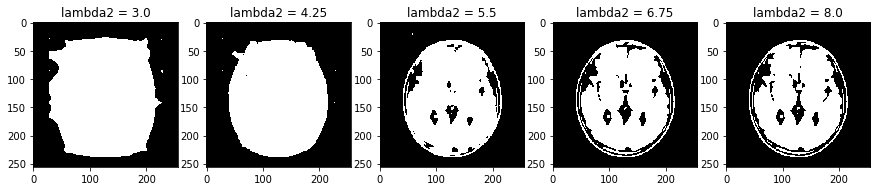

In [37]:
im = im_brain2
name_param = 'lambda2'
tmp_arr=np.linspace(3,8,5)
partie_2_multiple(im,name_param, tmp_arr,init = init_ls_circle(im, 8), save =True)

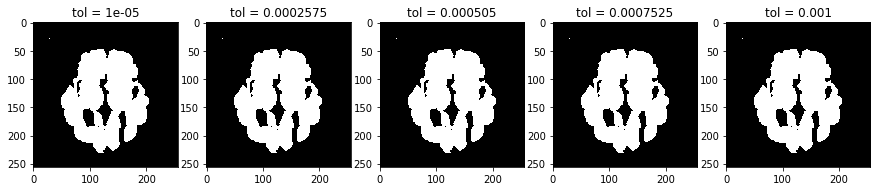

In [42]:
im = im_brain2
name_param = 'tol'
tmp_arr=np.linspace(1e-5,1e-3,5)
partie_2_multiple(im,name_param, tmp_arr,init = init_ls_circle(im, 8), save =True)

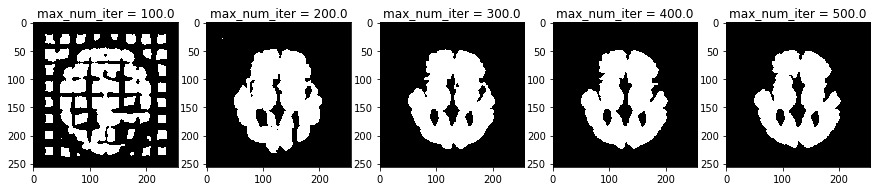

In [45]:
im = im_brain2
name_param = 'max_num_iter'
tmp_arr=np.linspace(100,500,5)
partie_2_multiple(im,name_param, tmp_arr,init = init_ls_circle(im, 8), save =True)

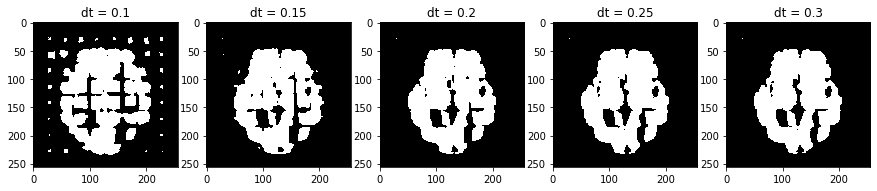

In [40]:
im = im_brain2
name_param = 'dt'
tmp_arr=np.linspace(0.1,0.3,5)
partie_2_multiple(im,name_param, tmp_arr,init = init_ls_circle(im, 8), save =True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


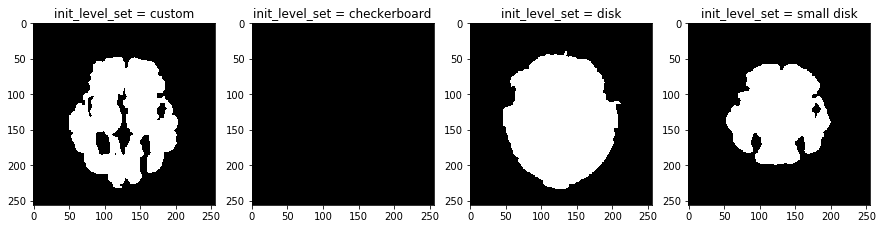

In [44]:
im = im_brain2
name_param = 'init_level_set'
tmp_arr=[init_ls_circle(im, 8), 'checkerboard', 'disk', 'small disk']
partie_2_multiple(im,name_param, tmp_arr,init = init_ls_circle(im, 8), save =True)

# 2 - Segmentation

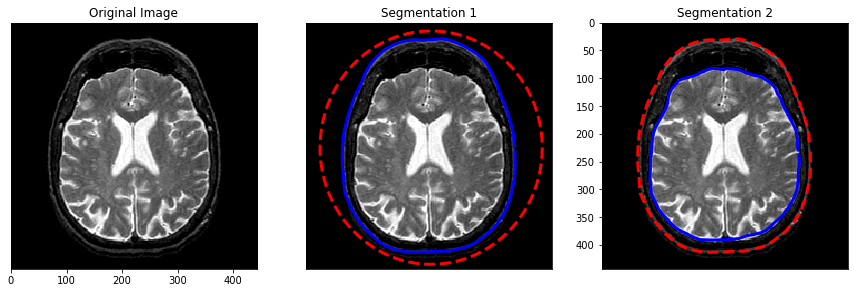

In [200]:
im=im_brain
s = np.linspace(0, 2*np.pi, 100)
r = 225 + 210*np.sin(s)
c = 225 + 200*np.cos(s)
init_b = np.array([r, c]).T

s = np.linspace(0, 2*np.pi, 100)
r = 235 + 180*np.sin(s)
c = 220 + 145*np.cos(s)
init_b2 = np.array([r, c]).T
   
snake1 = active_contour(gaussian(im, 1), init_b, boundary_condition='periodic',
                   alpha=0.1, beta=0.001, w_line=0, w_edge=10, gamma=0.1)

snake2 = active_contour(gaussian(im, 1), snake1, boundary_condition='periodic',
                   alpha=0.1, beta=0.01, w_line=0, w_edge=3, gamma=0.009)



axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 3, sharex=False, sharey=False))

#axs[0].imshow(im, cmap='gray')

axs[0].imshow(im, cmap='gray', vmin = 0, vmax = 255)
axs[0].set_title('Original Image')



axs[1].imshow(im, cmap=plt.cm.gray)
axs[1].plot(init_b[:, 1], init_b[:, 0], '--r', lw=3)
axs[1].plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
axs[1].set_xticks([]), axs[1].set_yticks([])
axs[1].axis([0, im.shape[1], im.shape[0], 0])
axs[1].set_title('Segmentation 1')

axs[2].imshow(im, cmap=plt.cm.gray)
axs[2].plot(snake1[:, 1], snake1[:, 0], '--r', lw=3)
axs[2].plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
axs[2].set_xticks([]), axs[0].set_yticks([])
axs[2].axis([0, im.shape[1], im.shape[0], 0])
axs[2].set_title('Segmentation 2')


#axs[2].imshow(im, cmap=plt.cm.gray)
#axs[2].plot(snake2[:, 1], snake2[:, 0], '--r', lw=3)
#axs[2].plot(snake3[:, 1], snake3[:, 0], '-b', lw=3)
#axs[2].set_xticks([]), axs[2].set_yticks([])
#axs[2].axis([0, im.shape[1], im.shape[0], 0])
#axs[2].set_title('')

if True:
    plt.savefig('images/segmentation_brain.pdf', bbox_inches = 'tight')

plt.show()
    

(700, 584)


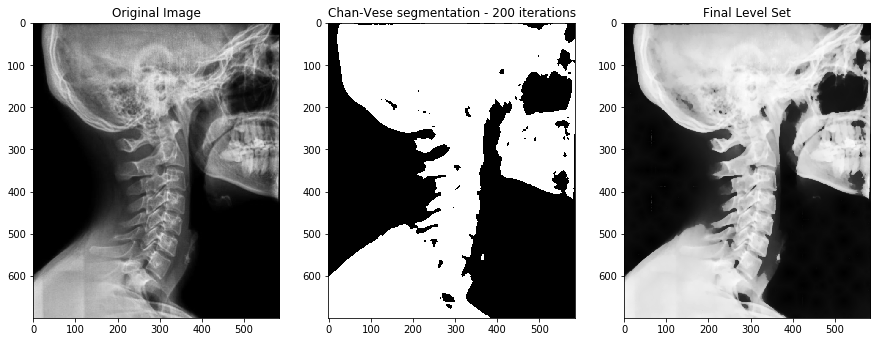

In [197]:
im = im_skull
print(im.shape)
circleNum = 8
circleRadius = im.shape[0] / (3*circleNum)
circleStep0 = im.shape[0]/(circleNum+1)
circleStep1 = im.shape[1]/(circleNum+1)
init_ls = np.zeros(im.shape)
for i in range(circleNum):
        for j in range(circleNum):
            center_f= ((i+1)*circleStep0, (j+1)*circleStep1)
            
            init_ls = init_ls + disk_level_set (im.shape,center=center_f,radius=circleRadius)


axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 3, sharex=False, sharey=False))
    
    
cv = chan_vese(im, mu=0.25, lambda1=15, lambda2=16, tol=1e-4, max_num_iter=200,
               dt=0.5, init_level_set=init_ls, extended_output=True)


axs[0].imshow(im, cmap='gray', vmin = 0, vmax = 255)
axs[0].set_title('Original Image')

axs[1].imshow(cv[0],cmap="gray")
t = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
axs[1].set_title(t)

axs[2].imshow(cv[1], cmap="gray")
axs[2].set_title("Final Level Set", fontsize=12)

if True:
    plt.savefig('images/segmentation_skull.pdf', bbox_inches = 'tight')

plt.show()



(900, 684)


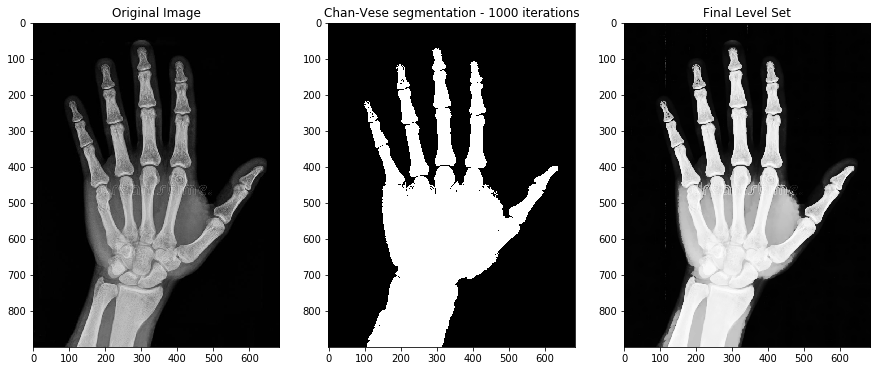

In [209]:
im = im_hand
print(im.shape)
init = init_ls_circle(50)

axs = (plt.figure(figsize=(15,20),constrained_layout=False)
       .subplots(1, 3, sharex=False, sharey=False))
    
    
cv = chan_vese(im, mu=0.25, lambda1=15, lambda2=16, tol=1e-4, max_num_iter=1000,
               dt=0.5, init_level_set=init, extended_output=True)


axs[0].imshow(im, cmap='gray', vmin = 0, vmax = 255)
axs[0].set_title('Original Image')


axs[1].imshow(cv[0],cmap="gray")
t = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
axs[1].set_title(t)

axs[2].imshow(cv[1], cmap="gray")
axs[2].set_title("Final Level Set", fontsize=12)

if True:
    plt.savefig('images/segmentation_hand.pdf', bbox_inches = 'tight')

plt.show()

